**Visualizing tweets and the Logistic Regression model**

**Objectives**: Visualize and interpret the logistic regression model

**Steps**:

Plot tweets in a scatter plot using their positive and negative sums.
Plot the output of the logistic regression model in the same plot as a solid line

In [3]:
import nltk                         # NLP toolbox
from os import getcwd
import pandas as pd                 # Library for Dataframes 
from nltk.corpus import twitter_samples 
import matplotlib.pyplot as plt     # Library for visualization
import numpy as np                  # Library for math functions

# from utils import process_tweet, build_freqs # Our functions for NLP

In [4]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [5]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

tweets = all_positive_tweets + all_negative_tweets ## Concatenate the lists. 
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

# split the data into two pieces, one for training and one for testing (validation set) 
train_pos  = all_positive_tweets[:4000]
train_neg  = all_negative_tweets[:4000]

train_x = train_pos + train_neg 

print("Number of tweets: ", len(train_x))

Number of tweets:  8000


In [6]:
data = pd.read_csv('C:\\Users\\Mit\\Documents\\PythonProjects\\NLP\\Natural-Language-Processing-Specialization\\logistic_features.csv')
data.head(10)

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


In [7]:
X = data[["bias", "positive", "negative"]].values
y = data['sentiment'].values

print(X.shape) # Print the shape of the X part
print(X) # Print some rows of X

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


**Load a pretrained Logistic Regression model**



In [8]:
theta = [7e-08, 0.0005239, -0.00055517]

**Plot the samples in a scatter plot**

The vector theta represents a plane that split our feature space into two parts. Samples located over that plane are considered positive, and samples located under that plane are considered negative. Remember that we have a 3D feature space, i.e., each tweet is represented as a vector comprised of three values: [bias, positive_sum, negative_sum], always having bias = 1.

Text(0, 0.5, 'Negative')

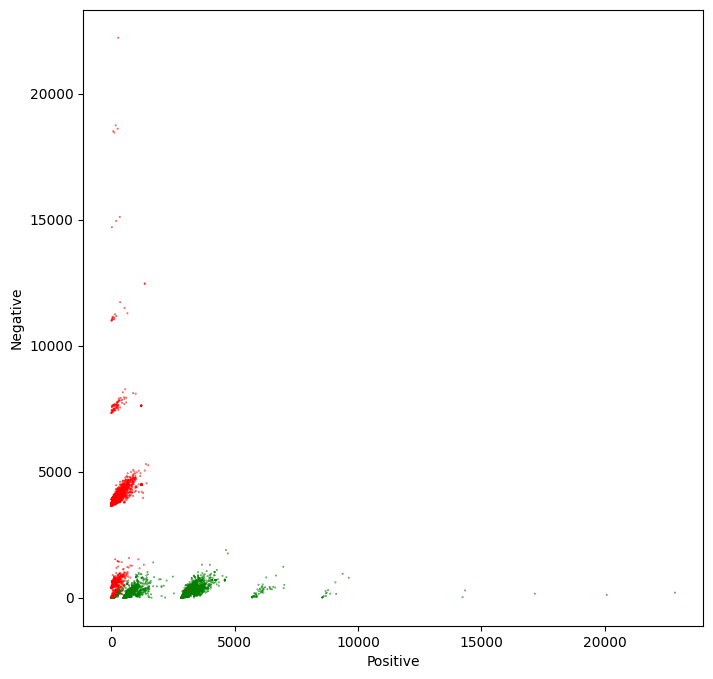

In [10]:
# Plot the samples in a scatter plot
fig, ax  = plt.subplots(figsize = (8, 8))
colors = ['red', 'green']

# Color based on sentiment Y
ax.scatter(X[:, 1], X[:, 2], c = [colors[int(k)] for k in y], s = 0.1)
plt.xlabel("Positive")
plt.ylabel("Negative")

From the plot, it is evident that the features that we have chosen to represent tweets as numerical vectors allow an almost perfect separation between positive and negative tweets. So you can expect a very high accuracy for this model!

In [11]:
# Equation for seperation plane
def neg(theta, pos):
    return (-theta[0] - pos * theta[1] / theta[2])

# Equation for the direction of the sentiments change
def direction(theta, pos):
    return pos * theta[2] / theta[1]



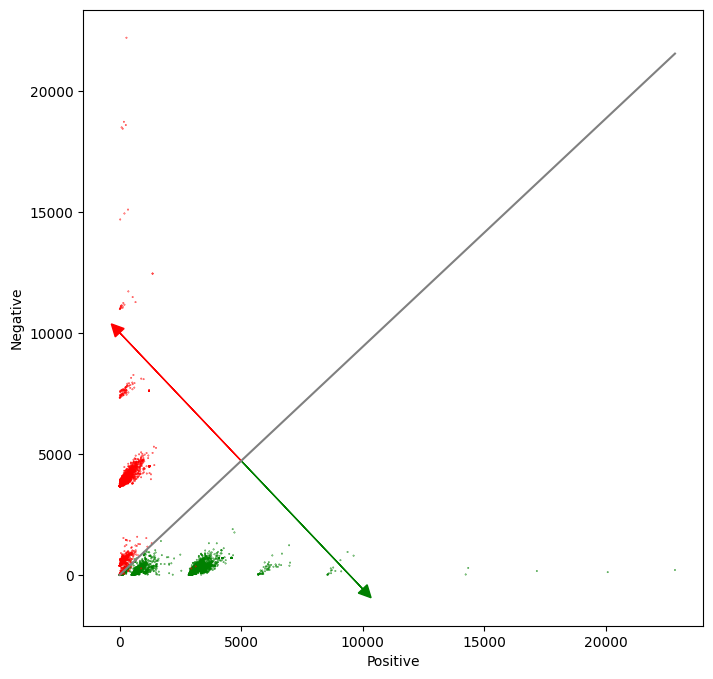

In [17]:
#Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green'] 

ax.scatter(X[:, 1], X[:, 2], c = [colors[int(k)] for k in y], s = 0.1)
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart
maxpos = np.max(X[:, 1])

offset = 5000

# Plot a gray line that divides the 2 area
ax.plot([0, maxpos], [neg(theta, 0),  neg(theta, maxpos)], color = 'gray')

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()

In [16]:
len([0, maxpos])

2